In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix



# We add all Plotly and Dash necessary librairies
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_daq as daq
from dash.dependencies import Input, Output

C:\Users\kondo\AppData\Local\Temp/ipykernel_9948/889199656.py:22: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\kondo\AppData\Local\Temp/ipykernel_9948/889199656.py:23: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


C:\Users\kondo\AppData\Local\Temp/ipykernel_9948/2527557409.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


Index(['min_x_position', 'avg_x_position', 'avg_y_position',
       'avg_main_current', 'max_noise', 'avg_vibrations', 'max_vibrations',
       'avg_z_position', 'min_z_position', 'penetration', 'process_time',
       'oscillations_count', 'min_temperature', 'luminosity', 'launch_time',
       'avg_main_force', 'x_distance', 'y_distance', 'z_distance',
       'time_reference_diff', 'x_pos_reference_diff', 'z_pos_reference_diff',
       'off_limits_average', 'position_range', 'current_range',
       'current_signal_noise_ratio', 'preparation_time'],
      dtype='object')


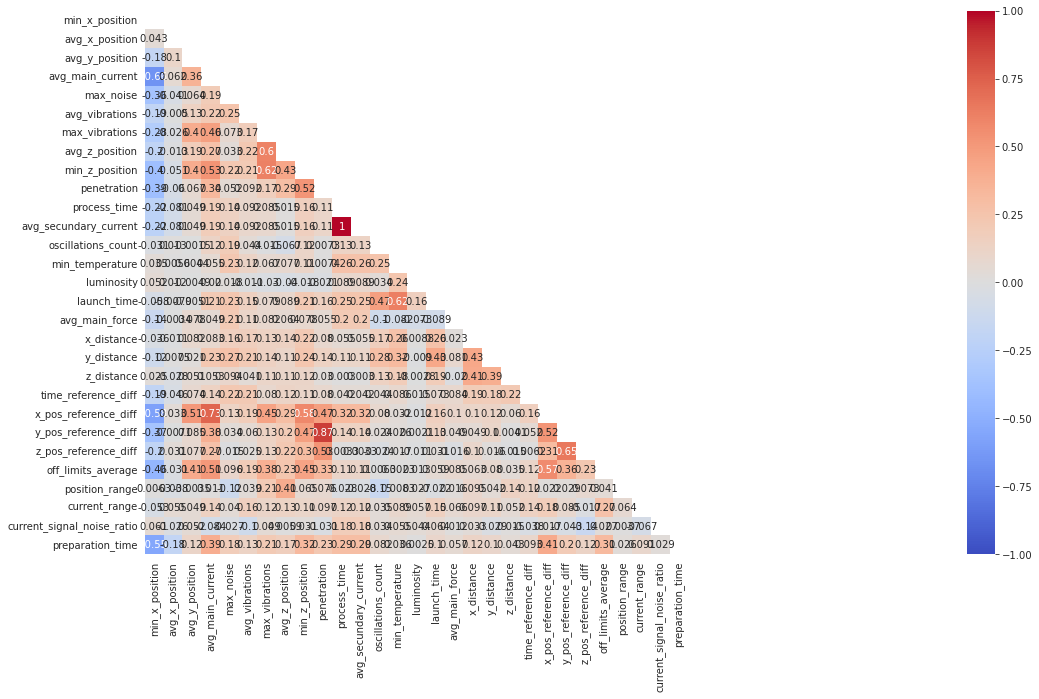

In [3]:
df = df= pd.read_csv("Data/predictive_maintainence.csv")
X= df.drop(columns=["process_id","failure"])
Y= df["failure"]


corr = X.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(100, 10))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.79)]
X = X.drop(columns=to_drop)
X_colm= X.columns
print(X_colm)


In [4]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
print(model)


E:\Anaconda\envs\DA_Envi\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [5]:
y_pred_test= model.predict(X_test)
y_pred_train= model.predict(X_train)
predictions = [round(value) for value in y_pred_test]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.93%


In [6]:

df_feature_importances = pd.DataFrame(model.feature_importances_*100,columns=["Importance"],index=X_colm)
df_feature_importances = df_feature_importances.sort_values("Importance", ascending=False)


# We create a Features Importance Bar Chart
fig_features_importance = go.Figure()
fig_features_importance.add_trace(go.Bar(x=df_feature_importances.index,
                                         y=df_feature_importances["Importance"],
                                         marker_color='rgb(171, 226, 251)')
                                 )
fig_features_importance.update_layout(title_text='<b>Features Importance of the model<b>', title_x=0.5)
fig_features_importance.show()

,Error_metric,Train,Test
0,Accuracy,1.0,0.999299
1,Precision,1.0,0.857143
2,Recall,1.0,0.857143


Confusion matrix for the train set
[[5771    0]
 [   0   23]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



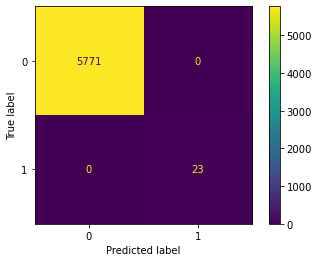



Confusion matrix for the test set
[[2846    1]
 [   1    6]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



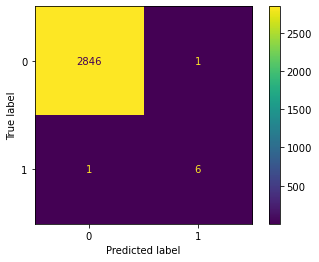

In [7]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()

In [8]:
# We record the name, min, mean and max of the three most important features
# We record the name, min, mean and max of the three most important features
dropdown_1_label = df_feature_importances.index[0]
dropdown_1_min = math.floor(df[dropdown_1_label].min())
dropdown_1_mean = round(df[dropdown_1_label].mean())
dropdown_1_max = round(df[dropdown_1_label].max())

dropdown_2_label = df_feature_importances.index[1]
dropdown_2_min = math.floor(df[dropdown_2_label].min())
dropdown_2_mean = round(df[dropdown_2_label].mean())
dropdown_2_max = round(df[dropdown_2_label].max())

dropdown_3_label = df_feature_importances.index[2]
dropdown_3_min = math.floor(df[dropdown_3_label].min())
dropdown_3_mean = round(df[dropdown_3_label].mean())
dropdown_3_max = round(df[dropdown_3_label].max())
dropdown_3_max

1921

In [9]:
app = dash.Dash()

# The page structure will be:
#    Features Importance Chart
#    <H4> Feature #1 name
#    Slider to update Feature #1 value
#    <H4> Feature #2 name
#    Slider to update Feature #2 value
#    <H4> Feature #3 name
#    Slider to update Feature #3 value
#    <H2> Updated Prediction
#    Callback fuction with Sliders values as inputs and Prediction as Output

# We apply basic HTML formatting to the layout
app.layout = html.Div(style={'textAlign': 'center', 'width': '800px', 'font-family': 'Verdana'},
                      
                    children=[

                        # Title display
                        html.H1(children="Simulation Tool"),
                        
                        # Dash Graph Component calls the fig_features_importance parameters
                        dcc.Graph(figure=fig_features_importance),
                        
                        # We display the most important feature's name
                        html.H4(children=dropdown_1_label),

                        # The Dash Slider is built according to Feature #1 ranges
                        dcc.Slider(
                            id='X1_slider',
                            min=dropdown_1_min,
                            max=dropdown_1_max,
                            step=0.5,
                            value=dropdown_1_mean,
                            marks={i: '{}'.format(i) for i in range(dropdown_1_min, dropdown_1_max+1,25)}
                            ),

                        html.H4(children=dropdown_2_label),

                        dcc.Slider(
                            id='X2_slider',
                            min=dropdown_2_min,
                            max=dropdown_2_max,
                            step=0.5,
                            value=dropdown_2_mean,
                            marks={i: '{}'.format(i) for i in range(dropdown_2_min, dropdown_2_max+1,10000)}
                        ),

                        html.H4(children=dropdown_3_label),

                        dcc.Slider(
                            id='X3_slider',
                            min=dropdown_3_min,
                            max=dropdown_3_max,
                            step=0.5,
                            value=dropdown_3_mean,
                            marks={i: '{}'.format(i) for i in range(dropdown_3_min, dropdown_3_max+1,300)}
                        ),

                        html.H2(id="prediction_result"),

                    ])

In [10]:
# The callback function will provide one "Ouput" in the form of a string (=children)
@app.callback(Output(component_id="prediction_result",component_property="children"),
# The values correspnding to the three sliders are obtained by calling their id and value property
              [Input("X1_slider","value"), Input("X2_slider","value"), Input("X3_slider","value")])

# The input variable are set in the same order as the callback Inputs
def update_prediction(X1, X2, X3):
    ip_df = pd.DataFrame()
    ip_se= pd.Series([df['min_x_position'].mean(),df['avg_x_position'].mean(), df['avg_y_position'].mean(),df['avg_main_current'].mean(), df['max_noise'].mean(), df['avg_vibrations'].mean(), df['max_vibrations'].mean(),df['avg_z_position'].mean(), df['min_z_position'].mean(), df['penetration'].mean(), df['process_time'].mean(),X2, X1, df['luminosity'].mean(), X3,df['avg_main_force'].mean(),df['x_distance'].mean(), df['y_distance'].mean(), df['z_distance'].mean(), df['time_reference_diff'].mean(), df['x_pos_reference_diff'].mean(), df['z_pos_reference_diff'].mean(),df['off_limits_average'].mean(), df['position_range'].mean(), df['current_range'].mean(),df['current_signal_noise_ratio'].mean(), df['preparation_time'].mean()],index = X.columns)
    ip_df= ip_df.append(ip_se, ignore_index=True)
    prediction = ((model.predict_proba(ip_df))[0][0])*100.
    return "Prediction: {}".format(prediction)

if __name__ == "__main__":
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Dec/2021 07:44:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:13] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:13] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:13] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:13] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:13] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 07:44:16] "POST /_dash-update-component HTTP/1.1" 200 -
